## Resources

- [Kaggle Dataset US Wildfires](https://www.kaggle.com/rtatman/188-million-us-wildfires)

### other approaches

- [Forest Fire Prediction by Douglas Woolford](https://www.uwo.ca/sci/research/infinity/forest_fire_prediction.html)
- [Outlooks Fire Prediction](https://www.nifc.gov/nicc/predictive/outlooks/outlooks.htm)

### ideas

- fire cause, size, location (county) prediction, depending on size, location, date etc.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(
    "./data/wildfires.csv",
    low_memory=False
)
df.shape

(1880465, 39)

In [3]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [4]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

## ToDo's

- convert date
- drop useless columns
- convert some columns into meaningful numeric values

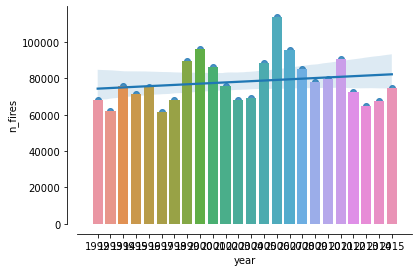

In [69]:
# plot fires per year
a = df["FIRE_YEAR"].value_counts(sort=False).reset_index(name="n_fires").rename(columns={"index": "year"})
ax = sns.barplot(data=a, x="year", y="n_fires")
sns.regplot(data=a, x=np.arange(0, len(a)), y="n_fires", ax=ax)


<AxesSubplot:xlabel='year', ylabel='fire_size_sum'>

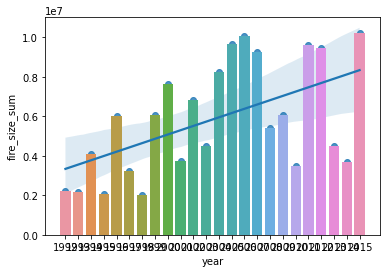

In [74]:
# plot summed fire size per year
a = df.groupby("FIRE_YEAR")["FIRE_SIZE"].sum().reset_index(name="fire_size_sum").rename(columns={"FIRE_YEAR": "year"})
ax = sns.barplot(data=a, x="year", y="fire_size_sum")
sns.regplot(data=a, x=np.arange(0, len(a)), y="fire_size_sum", ax=ax)

<AxesSubplot:xlabel='year', ylabel='n_fires'>

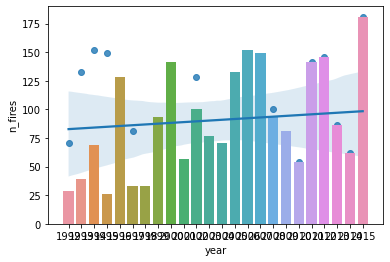

In [88]:
#a = df.loc[(df["FIRE_SIZE_CLASS"] == "D") | (df["FIRE_SIZE_CLASS"] == "E")]["FIRE_YEAR"].value_counts(sort=False).reset_index(name="n_fires").rename(columns={"index": "year"})
a = df.loc[df["FIRE_SIZE"] > 10000]["FIRE_YEAR"].value_counts(sort=False).reset_index(name="n_fires").rename(columns={"index": "year"})
ax = sns.barplot(data=a, x="year", y="n_fires")
sns.regplot(data=a, x=np.arange(0, len(a)), y="n_fires", ax=ax)

In [3]:
df["STAT_CAUSE_DESCR"].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [4]:
df = df.drop(columns=["OBJECTID", "FOD_ID", "FPA_ID", "Shape"])
df.shape

(1880465, 35)

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

<AxesSubplot:>

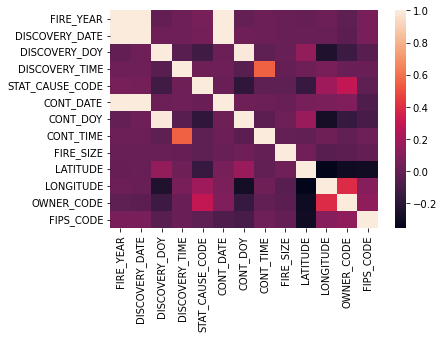

In [13]:
sns.heatmap(df.corr())

# long - cause
#http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

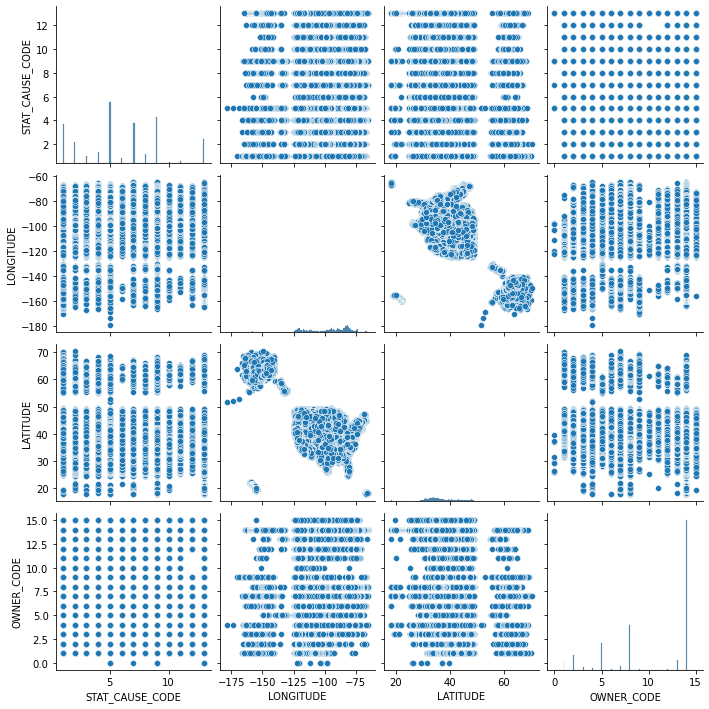

In [6]:
sns.pairplot(data=df[["STAT_CAUSE_CODE", "LONGITUDE", "LATITUDE", "OWNER_CODE"]])

<AxesSubplot:>

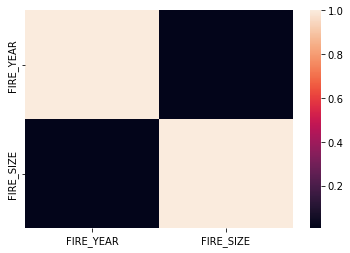

In [7]:
sns.heatmap(data=df[["FIRE_YEAR", "FIRE_SIZE"]].corr())

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

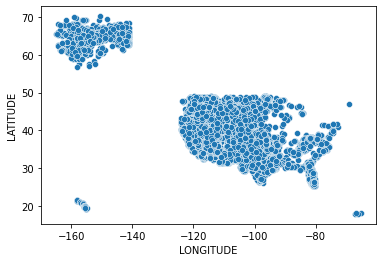

In [17]:
sns.scatterplot(data=df.loc[df["FIRE_SIZE"] > 1000], x="LONGITUDE", y="LATITUDE")

In [8]:
df["STATE"].value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [9]:
df.groupby("STATE")["FIRE_SIZE"].sum()

STATE
AK    3.223309e+07
AL    9.205453e+05
AR    5.089118e+05
AZ    5.576681e+06
CA    1.274586e+07
CO    1.842309e+06
CT    1.124331e+04
DC    3.250000e+01
DE    4.833650e+03
FL    4.436748e+06
GA    1.589959e+06
HI    2.527610e+05
IA    7.149196e+04
ID    1.368433e+07
IL    2.280751e+04
IN    1.732289e+04
KS    9.226138e+05
KY    1.014891e+06
LA    6.610239e+05
MA    6.124730e+03
MD    6.727953e+04
ME    2.455564e+04
MI    1.402294e+05
MN    1.210605e+06
MO    4.595257e+05
MS    1.135484e+06
MT    6.279526e+06
NC    7.305215e+05
ND    4.126072e+05
NE    9.673988e+05
NH    3.862007e+03
NJ    1.319635e+05
NM    6.380042e+06
NV    9.015855e+06
NY    9.377197e+04
OH    2.393385e+04
OK    3.232490e+06
OR    8.412801e+06
PA    5.473077e+04
PR    1.386884e+05
RI    5.624100e+02
SC    5.416661e+05
SD    1.570866e+06
TN    4.866524e+05
TX    9.786218e+06
UT    4.114926e+06
VA    3.416458e+05
VT    1.556486e+03
WA    4.782218e+06
WI    8.867527e+04
WV    5.766311e+05
WY    2.401471e+06
Name: 

## Zu prüfende Korrelationen
- long, lat location zu jahreszeit
- size zu containment time
- monat/jahreszeit zu size/frequenz der feuer

## Anmerkungen von Herrn Prof. Schöler:

- One Hot Encoding testen
- Numerische Daten besser zu interpretieren
-